# import libraries 

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# load data

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# data preprocessing

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
print("train images shape: ", train_images.shape)
print("train labels shape: ", train_labels.shape)
print("test images shape: ", test_images.shape)
print("test labels shape: ", test_labels.shape)

train images shape:  (60000, 28, 28)
train labels shape:  (60000,)
test images shape:  (10000, 28, 28)
test labels shape:  (10000,)


# build the model

In [12]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# compile the model

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train the model

In [15]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4712 - accuracy: 0.8301 - val_loss: 0.3697 - val_accuracy: 0.8636
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3151 - accuracy: 0.8845 - val_loss: 0.3141 - val_accuracy: 0.8874
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2684 - accuracy: 0.9011 - val_loss: 0.2889 - val_accuracy: 0.8915
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2382 - accuracy: 0.9120 - val_loss: 0.2749 - val_accuracy: 0.8980
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2127 - accuracy: 0.9219 - val_loss: 0.2993 - val_accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1916 - accuracy: 0.9284 - val_loss: 0.2555 - val_accuracy: 0.9122
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1735 - accuracy: 0.9350 - val_loss: 0.2556 -

# evaluate the model

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2830 - accuracy: 0.9086


# make predictions

In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


# display output

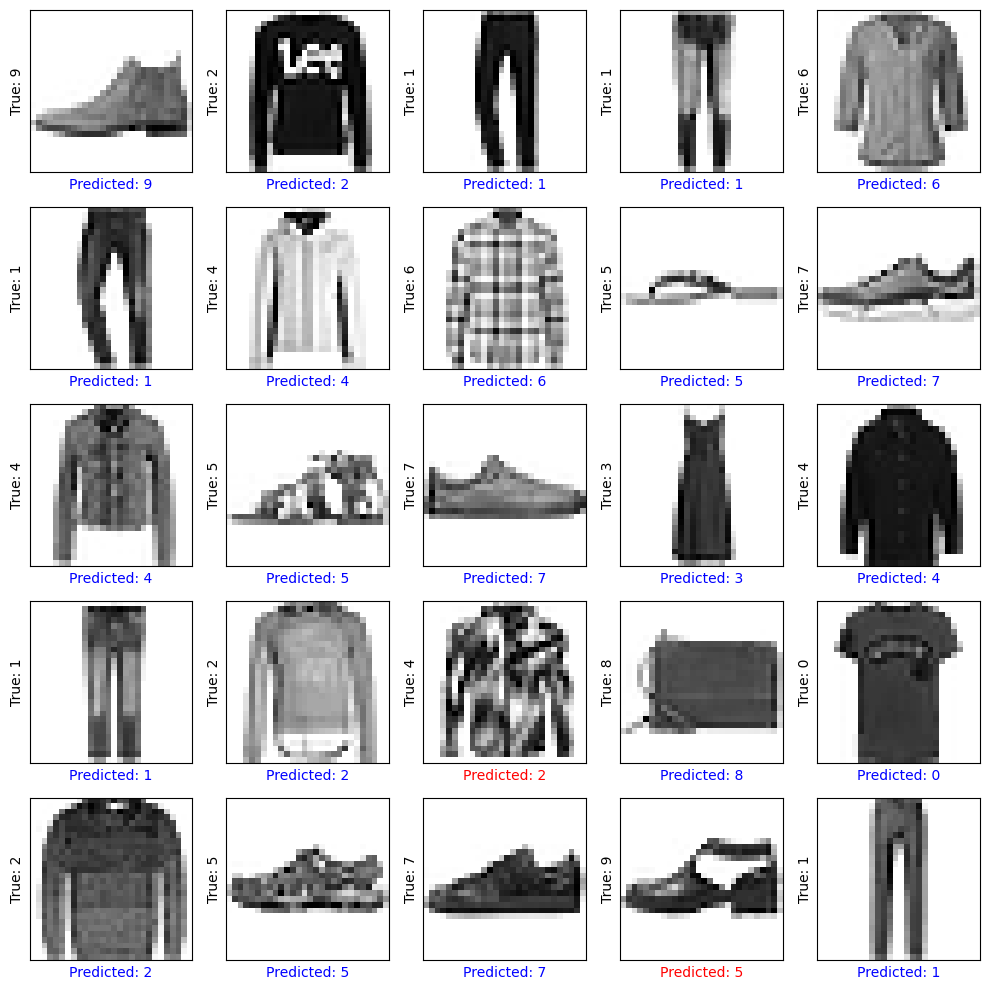

In [20]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    plt.xlabel(f"Predicted: {predicted_label}", color='blue' if predicted_label == true_label else 'red')
    plt.ylabel(f"True: {true_label}")
plt.tight_layout()
plt.show()